# Data Analysis

## Dependencies

In [118]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Import Data

In [119]:
account_data = pd.read_csv("../../assets/clean/account.csv")
card_data = pd.read_csv("../../assets/clean/card_dev.csv")
client_data = pd.read_csv("../../assets/clean/client.csv")
disp_data = pd.read_csv("../../assets/clean/disp.csv", dtype={"disp_id": int, "client_id": int, "account_id": int, "type": str})
district_data = pd.read_csv("../../assets/clean/district.csv")
loan_data = pd.read_csv("../../assets/clean/loan_dev.csv")
transaction_data = pd.read_csv("../../assets/clean/trans_dev.csv", dtype=
    {"trans_id": str, "account_id": str, "date": str, "type": str, "operation": str, "amount": float, "balance": float, "k_symbol": str, "bank": str, "account": str}
)


## Data Exploratory Analysis

In [120]:
# Variable used to avoid re-running certain cells
DATA_IS_LOADED = False

### Change Pandas display settings

In [121]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

### Analyze the Size of each Dataset

In [122]:
print("=============================================\n")
print("Number of rows for each dataset: \n")
print(f"Account: {len(account_data)}")
print(f"Card: {len(card_data)}")
print(f"Client: {len(client_data)}")
print(f"Disposition: {len(disp_data)}")
print(f"District: {len(district_data)}")
print(f"Loan: {len(loan_data)}")
print(f"Transaction: {len(transaction_data)}")


Number of rows for each dataset: 

Account: 4500
Card: 177
Client: 5369
Disposition: 5369
District: 77
Loan: 328
Transaction: 396685


### Get Missing Values

In [123]:
print("=============================================\n")
print("Missing values for each dataset: \n")
print(f"Account: \n{account_data.isnull().sum()} \n")
print(f"Card: \n{card_data.isnull().sum()} \n")
print(f"Client: \n{client_data.isnull().sum()} \n")
print(f"Disposition: \n{disp_data.isnull().sum()} \n")
print(f"District: \n{district_data.isnull().sum()} \n")
print(f"Loan: \n{loan_data.isnull().sum()} \n")
print(f"Transaction: \n{transaction_data.isnull().sum()} \n")

# TODO: Confirm if missing values are all being tracked. Values such as '?' exist in the original dataset


Missing values for each dataset: 

Account: 
account_id     0
district_id    0
frequency      0
date           0
dtype: int64 

Card: 
card_id    0
disp_id    0
type       0
issued     0
dtype: int64 

Client: 
client_id       0
birth_number    0
district_id     0
gender          0
dtype: int64 

Disposition: 
disp_id       0
client_id     0
account_id    0
type          0
dtype: int64 

District: 
code                 0
name                 0
region               0
num_inhabitants      0
municip499           0
municip500_1999      0
municip2000_9999     0
municip10000         0
no. of cities        0
urban_ratio          0
avg_salary           0
unemp_rate95         1
unemp_rate96         0
num_entrepreneurs    0
num_crimes95         1
num_crimes96         0
dtype: int64 

Loan: 
loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
paid          0
dtype: int64 

Transaction: 
trans_id           0
account_id         0
date               0
typ

### Analyze Loans

In [124]:
print("=============================================\n")
paid_loans = loan_data[loan_data["paid"] == 1]
unpaid_loans = loan_data[loan_data["paid"] == 0]
paid_loans_percentage = round((len(paid_loans)/len(loan_data)) * 100, 2)
print(f"{paid_loans_percentage}% of loans are paid.")


85.98% of loans are paid.


Approx 86% of loans have been paid (positive result). This means
means that accuracy isn't a good metric to optimize for

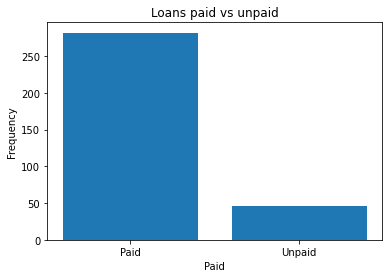

In [125]:
plt.figure()
plt.bar([0, 1], loan_data["paid"].value_counts(), tick_label=["Paid", "Unpaid"])
# plt.ylim(0, 300)
plt.title("Loans paid vs unpaid")
plt.xlabel("Paid")
plt.ylabel("Frequency")
plt.show()

### Investigate attributes with a large quantity of nulls

In [126]:
# TOOD: SPLIT THIS INTO DIFFERENT CELLS

def parse_k_symbol(k_symb):
    if isinstance(k_symb, float):
        return 'none'
    elif k_symb == " ":
        return 'none'
    else:
        return k_symb

print("=============================================\n")
print("[Operation]:")
print(transaction_data["operation"].value_counts())
operationNullsPercentage = round(len(transaction_data[transaction_data["operation"].isnull()]) / len(transaction_data["operation"]) * 100, 2)
print(f"Nulls (%): {operationNullsPercentage}%")
''' The operation attribute is categorical and doesn't reveal an inherited order. It can be encoded with 3 attributes
using binary encoding. We will fill the 'nulls' with "unknown"
'''

transaction_data['operation'].fillna("unknown", inplace=True)
# print(transaction_data["operation"].value_counts())

print("\n[k_symbol]:")
# print(transaction_data["k_symbol"].value_counts())
''' The k_symbol attribute is categorical and doesn't reveal an inherited order. It can be encoded with 3 attributes
using binary encoding. We will replace the " " with "none"
'''

transaction_data["k_symbol"] = transaction_data["k_symbol"].apply(parse_k_symbol)
print(transaction_data["k_symbol"].value_counts())
k_symbol_none_percentage = round(len(transaction_data[transaction_data["k_symbol"] == "none"]) / len(transaction_data["k_symbol"]) * 100, 2)
print(f"Nulls (%): {k_symbol_none_percentage}%")


print("\n[bank]:")
#print(transaction_data["bank"].value_counts())
print("Number of unknown banks:", len(transaction_data[transaction_data['bank'].isnull()]))

print("\n[account]:")
# print(transaction_data["account"].value_counts())
print("Number of unknown partners:", len(transaction_data[transaction_data['account'].isnull()]) + len(transaction_data[transaction_data['account'] == "0"]))

rows = transaction_data[transaction_data["bank"].isnull() & (~transaction_data["account"].isnull()) & (transaction_data["account"] != "0")]
print(f"Number of rows where bank is empty and the account isn't: {len(rows)}")
'''This proves that these 2 feature are highly correlated. Although these 2 attributes aren't likely to contribute anything to our prediction, we can create an
"unknown" bank and set all unknown account attributes to 0.'''

transaction_data["account"].fillna(0, inplace=True)
transaction_data["bank"].fillna("unknown", inplace=True)


[Operation]:
withdrawal in cash              165270
remittance to another bank       70737
credit in cash                   62202
collection from another bank     26505
credit card withdrawal            1210
Name: operation, dtype: int64
Nulls (%): 17.84%

[k_symbol]:
none                                     204309
interest credited                         70761
payment for statement                     58377
household                                 42839
old-age pension                           13502
insurrance payment                         6592
sanction interest if negative balance       305
Name: k_symbol, dtype: int64
Nulls (%): 51.5%

[bank]:
Number of unknown banks: 299443

[account]:
Number of unknown partners: 299443
Number of rows where bank is empty and the account isn't: 0


In [127]:
# Auxiliary method to join 2 datasets
def join(df1, df2, key1, key2, suff, t="inner"):
    return df1.merge(df2, left_on=key1, right_on=key2, how=t, suffixes=suff)

### Join Data

It is needed to join all datasets into a single Dataframe

#### Join Account with Disposition

Let's first analyze the Disposition dataset:

Number of clients per disposition type:
OWNER        4500
DISPONENT     869
Name: type, dtype: int64


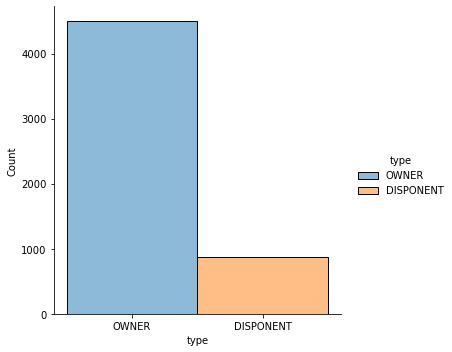

In [128]:
print("Number of clients per disposition type:")
print(disp_data["type"].value_counts())

sb.displot(disp_data, x="type", hue="type")
plt.show()

All Accounts have at least 1 Disposition. There are more Dispositions than Accounts, since some clients are **owners** while others are **disponent owners** 

We will create an attribute on the Account table that reflects whether the account is co-owned. Note that the DISPONENTs will be dropped from the joined table. The type attribute can be dropped as well since all dispositions are Owners.

In [129]:
df = join(account_data, disp_data, "account_id", "account_id", ["", "_disp"])
df.rename(columns={"date": "a_date"}, inplace=True)

# Count Groups
owner_count = df["account_id"].value_counts()
df["is_co-owned"] = df.apply(lambda row: 1 if owner_count[row["account_id"]] > 1 else 0, axis='columns')

# Cleanup
df.drop(df[df["type"] == "DISPONENT"].index, inplace=True)
df.drop(columns=["type"], inplace=True)

TODO: The column "disp_id" might also be useless since it's a 1-1 relation with the account now. But we
 will drop it after proving the correlation between the 2 attributes.'

### Join Clients

In [130]:
if not DATA_IS_LOADED:
    df = join(df, client_data, "client_id", "client_id", ["", "_client"], t="left")
    df.drop(['client_id'], axis='columns', inplace=True, errors='ignore')

#### Join Districts

Both the *Account* and the *Client* have a foreign key to the *District* table
We will for now add *District* info about both

In [131]:
if not DATA_IS_LOADED:
    # Add Client's District Data -> Change to MD
    df = join(df, district_data, "district_id_client", "code", ["", "_district"], t="inner")
    df.drop(['district_id_client'], axis='columns', inplace=True)

    # Add Accounts's District Data -> Change to MD
    df = join(df, district_data, "district_id", "code", ["_aDistrict", "_cDistrict"], t="inner")
    df.drop(['district_id'], axis='columns', inplace=True)
    
# df


Note that the district information regarding the *Account* contains an `a` prefix, while the *Client* info contains a `c` prefix.

Some of the Columns such as: *code_aDistrict* and *name_aDistrict* seem to be ambiguous. However, we will first confirm their correlation before removing them.

The next 3 tables have training and testing versions. Since we will do the data analysis of the training version, we'll ignore the other one for now

### Join Loan

In [132]:
if not DATA_IS_LOADED:
    # Merge to the right, since accounts that don't have loans are not relevant
    df = join(df, loan_data, "account_id", "account_id", ["", "_loan"], t="right")
    df.drop(['loan_id'], axis='columns', inplace=True)
    df.rename(columns={"date": "loan_date"}, inplace=True)
df

,account_id,frequency,a_date,disp_id,is_co-owned,birth_number,gender,code_aDistrict,name_aDistrict,region_aDistrict,num_inhabitants_aDistrict,municip499_aDistrict,municip500_1999_aDistrict,municip2000_9999_aDistrict,municip10000_aDistrict,no. of cities_aDistrict,urban_ratio_aDistrict,avg_salary_aDistrict,unemp_rate95_aDistrict,unemp_rate96_aDistrict,num_entrepreneurs_aDistrict,num_crimes95_aDistrict,num_crimes96_aDistrict,code_cDistrict,name_cDistrict,region_cDistrict,num_inhabitants_cDistrict,municip499_cDistrict,municip500_1999_cDistrict,municip2000_9999_cDistrict,municip10000_cDistrict,no. of cities_cDistrict,urban_ratio_cDistrict,avg_salary_cDistrict,unemp_rate95_cDistrict,unemp_rate96_cDistrict,num_entrepreneurs_cDistrict,num_crimes95_cDistrict,num_crimes96_cDistrict,loan_date,amount,duration,payments,paid
0,1787,weekly issuance,1993-03-22,2166,0,1947-07-22,0,30,Sokolov,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100.0,2985.0,2804,30,Sokolov,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100.0,2985.0,2804,1993-07-05,96396,12,8033,0
1,1801,monthly issuance,1993-02-13,2181,0,1968-07-22,1,46,Nachod,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117.0,2854.0,2618,46,Nachod,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117.0,2854.0,2618,1993-07-11,165960,36,4610,1
2,9188,monthly issuance,1993-02-08,11006,0,1936-06-02,1,45,Jicin,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132.0,2080.0,2122,45,Jicin,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132.0,2080.0,2122,1993-07-28,127080,60,2118,1
3,1843,monthly issuance,1993-01-30,2235,0,1940-04-20,0,14,Ceske Budejovice,south Bohemia,177686,69,27,10,1,9,74.8,10045,1.42,1.71,135.0,6604.0,6295,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137.0,3804.0,3868,1993-08-03,105804,36,2939,1
4,11013,weekly issuance,1993-02-14,13231,0,1978-09-07,1,63,Vyskov,south Moravia,86513,38,36,5,1,5,50.5,8288,3.79,4.52,110.0,1562.0,1460,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167.0,85677.0,99107,1993-09-06,274740,60,4579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9030,monthly issuance,1995-01-21,10813,1,1971-04-10,0,72,Olomouc,north Moravia,226122,32,50,7,4,4,62.6,8994,3.80,4.79,110.0,9672.0,9208,72,Olomouc,north Moravia,226122,32,50,7,4,4,62.6,8994,3.80,4.79,110.0,9672.0,9208,1996-12-12,155616,48,3242,1
324,3189,monthly issuance,1995-11-29,3855,0,1939-03-20,1,29,Rokycany,west Bohemia,45714,52,10,5,1,6,55.6,8843,2.82,3.60,113.0,818.0,888,29,Rokycany,west Bohemia,45714,52,10,5,1,6,55.6,8843,2.82,3.60,113.0,818.0,888,1996-12-15,222180,60,3703,0
325,8972,monthly issuance,1996-05-21,10742,0,1957-05-04,0,70,Karvina,north Moravia,285387,0,2,8,5,7,89.9,10177,6.63,7.75,81.0,9878.0,10108,70,Karvina,north Moravia,285387,0,2,8,5,7,89.9,10177,6.63,7.75,81.0,9878.0,10108,1996-12-21,45024,48,938,1
326,10963,monthly issuance,1995-05-20,13172,0,1953-06-01,1,16,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107.0,1874.0,1913,16,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107.0,1874.0,1913,1996-12-25,115812,36,3217,1


**Data quality dimension 5 - Integrity**

Most accounts don't have loan requests associated with them. This means that the data lacks integrity

### Join Card

Almost no *Client* in the dataset has a *Card*. This is rather problematic, since it creates a lot of missing values or lost of information.

The *Card* dataset contains only 2 useful columns:
- Card type -- can be ordered from worst to best
- Issuance date

The type of Card helps us rank clients. A *Client* with a gold card is better than a client with a junior card. On the other hand, the **issuance date** allows us to consider only cards that have been issued before the loan, as information after the loan is irrelevant for this prediction task.

The Card **type** is a categorical field:
- *junior* -- underage people (lowest tier), usually it isn't possible to withdraw money from them
- *classic*
- *gold* -- highest tier

**Since the field is ordered in tiers, in the cleaning process we should convert these values to a numerical scale where:**
- 0 -> no card
- 1 -> junior
- 2 -> classic
- 3 -> gold

In [133]:
if not DATA_IS_LOADED:
    card_disp = join(card_data, disp_data, "disp_id", "disp_id", ["_card", "_disp"])
    card_disp = card_disp.groupby([card_disp.account_id, card_disp.type_card]).size().unstack(fill_value=0)
card_disp

type_card,classic,gold,junior
account_id,,,
33,0,1,0
43,0,0,1
66,1,0,0
71,0,0,1
73,1,0,0
...,...,...,...
10227,1,0,0
10411,0,1,0
10520,0,1,0


In [134]:
if not DATA_IS_LOADED:
    df = join(df, card_data, "disp_id", "disp_id", ["", "_card"], t="left")
    df.fillna("none", inplace=True)
    df.drop(['card_id', 'disp_id'], axis='columns', inplace=True)
    df.rename(columns={"type": "card_type", "issued": "card_issued"}, inplace=True)

df


,account_id,frequency,a_date,is_co-owned,birth_number,gender,code_aDistrict,name_aDistrict,region_aDistrict,num_inhabitants_aDistrict,municip499_aDistrict,municip500_1999_aDistrict,municip2000_9999_aDistrict,municip10000_aDistrict,no. of cities_aDistrict,urban_ratio_aDistrict,avg_salary_aDistrict,unemp_rate95_aDistrict,unemp_rate96_aDistrict,num_entrepreneurs_aDistrict,num_crimes95_aDistrict,num_crimes96_aDistrict,code_cDistrict,name_cDistrict,region_cDistrict,num_inhabitants_cDistrict,municip499_cDistrict,municip500_1999_cDistrict,municip2000_9999_cDistrict,municip10000_cDistrict,no. of cities_cDistrict,urban_ratio_cDistrict,avg_salary_cDistrict,unemp_rate95_cDistrict,unemp_rate96_cDistrict,num_entrepreneurs_cDistrict,num_crimes95_cDistrict,num_crimes96_cDistrict,loan_date,amount,duration,payments,paid,card_type,card_issued
0,1787,weekly issuance,1993-03-22,0,1947-07-22,0,30,Sokolov,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100.0,2985.0,2804,30,Sokolov,west Bohemia,94812,15,13,8,2,10,81.8,9650,3.38,3.67,100.0,2985.0,2804,1993-07-05,96396,12,8033,0,none,none
1,1801,monthly issuance,1993-02-13,0,1968-07-22,1,46,Nachod,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117.0,2854.0,2618,46,Nachod,east Bohemia,112709,48,20,7,3,10,73.5,8369,1.79,2.31,117.0,2854.0,2618,1993-07-11,165960,36,4610,1,none,none
2,9188,monthly issuance,1993-02-08,0,1936-06-02,1,45,Jicin,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132.0,2080.0,2122,45,Jicin,east Bohemia,77917,85,19,6,1,5,53.5,8390,2.28,2.89,132.0,2080.0,2122,1993-07-28,127080,60,2118,1,none,none
3,1843,monthly issuance,1993-01-30,0,1940-04-20,0,14,Ceske Budejovice,south Bohemia,177686,69,27,10,1,9,74.8,10045,1.42,1.71,135.0,6604.0,6295,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,8754,3.83,4.31,137.0,3804.0,3868,1993-08-03,105804,36,2939,1,none,none
4,11013,weekly issuance,1993-02-14,0,1978-09-07,1,63,Vyskov,south Moravia,86513,38,36,5,1,5,50.5,8288,3.79,4.52,110.0,1562.0,1460,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167.0,85677.0,99107,1993-09-06,274740,60,4579,1,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,9030,monthly issuance,1995-01-21,1,1971-04-10,0,72,Olomouc,north Moravia,226122,32,50,7,4,4,62.6,8994,3.8,4.79,110.0,9672.0,9208,72,Olomouc,north Moravia,226122,32,50,7,4,4,62.6,8994,3.8,4.79,110.0,9672.0,9208,1996-12-12,155616,48,3242,1,none,none
324,3189,monthly issuance,1995-11-29,0,1939-03-20,1,29,Rokycany,west Bohemia,45714,52,10,5,1,6,55.6,8843,2.82,3.60,113.0,818.0,888,29,Rokycany,west Bohemia,45714,52,10,5,1,6,55.6,8843,2.82,3.60,113.0,818.0,888,1996-12-15,222180,60,3703,0,none,none
325,8972,monthly issuance,1996-05-21,0,1957-05-04,0,70,Karvina,north Moravia,285387,0,2,8,5,7,89.9,10177,6.63,7.75,81.0,9878.0,10108,70,Karvina,north Moravia,285387,0,2,8,5,7,89.9,10177,6.63,7.75,81.0,9878.0,10108,1996-12-21,45024,48,938,1,none,none
326,10963,monthly issuance,1995-05-20,0,1953-06-01,1,16,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107.0,1874.0,1913,16,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107.0,1874.0,1913,1996-12-25,115812,36,3217,1,none,none


There are very few clients with cards. Every *Client* with a card has been granted a loan

In [145]:
df["card_type"].value_counts()
print(df[df["card_type"] != "none"]["paid"].value_counts())

none       317
classic      8
gold         2
junior       1
Name: card_type, dtype: int64

### Join Transactions

===================

In [136]:
# Variable used to avoid re-running certain cells
DATA_IS_LOADED = True